# 十分钟上手 Pandas

`pandas` 是一个 `Python Data Analysis Library`。

安装请参考官网的教程，如果安装了 `Anaconda`，则不需要安装 `pandas` 库。

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 产生 Pandas 对象

`pandas` 中有三种基本结构：

- `Series`
    - 1D labeled homogeneously-typed array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, also size-mutable array

### Series

一维 `Series` 可以用一维列表初始化：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

默认情况下，`Series` 的下标都是数字（可以使用额外参数指定），类型是统一的。

### DataFrame

`DataFrame` 则是个二维结构，这里首先构造一组时间序列，作为我们第一维的下标：

In [3]:
dates = pd.date_range('20130101', periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

然后创建一个 `DataFrame` 结构：

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,-1.237074,-1.041508,0.771348,0.297422
2013-01-02,0.919015,-0.466018,0.683564,-0.802631
2013-01-03,0.630894,-1.081445,0.027893,-0.769049
2013-01-04,0.528156,1.803706,1.072646,-0.462823
2013-01-05,0.706733,-0.741719,-0.524855,0.967067
2013-01-06,1.500885,-0.269558,-1.732003,1.192894


默认情况下，如果不指定 `index` 参数和 `columns`，那么他们的值将用从 `0` 开始的数字替代。

除了向 `DataFrame` 中传入二维数组，我们也可以使用字典传入数据：

In [5]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


字典的每个 `key` 代表一列，其 `value` 可以是各种能够转化为 `Series` 的对象。

与 `Series` 要求所有的类型都一致不同，`DataFrame` 值要求每一列数据的格式相同：

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据

### 头尾数据

`head` 和 `tail` 方法可以分别查看最前面几行和最后面几行的数据（默认为 5）：

In [7]:
df.head()

,A,B,C,D
2013-01-01,-1.237074,-1.041508,0.771348,0.297422
2013-01-02,0.919015,-0.466018,0.683564,-0.802631
2013-01-03,0.630894,-1.081445,0.027893,-0.769049
2013-01-04,0.528156,1.803706,1.072646,-0.462823
2013-01-05,0.706733,-0.741719,-0.524855,0.967067


最后 3 行：

In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.528156,1.803706,1.072646,-0.462823
2013-01-05,0.706733,-0.741719,-0.524855,0.967067
2013-01-06,1.500885,-0.269558,-1.732003,1.192894


### 下标，列标，数据

下标使用 `index` 属性查看：

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

列标使用 `columns` 属性查看：

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

数据值使用 `values` 查看：

In [11]:
df.values

array([[-1.23707352, -1.04150762,  0.77134777,  0.29742184],
       [ 0.91901543, -0.46601846,  0.683564  , -0.80263106],
       [ 0.63089378, -1.08144535,  0.02789275, -0.76904877],
       [ 0.52815576,  1.80370584,  1.07264554, -0.46282349],
       [ 0.7067329 , -0.74171912, -0.52485498,  0.96706728],
       [ 1.50088538, -0.26955838, -1.73200252,  1.19289445]])

### 统计数据

查看简单的统计数据：

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.508102,-0.299424,0.049765,0.070480
std,0.922501,1.077931,1.046330,0.879401
min,-1.237074,-1.081445,-1.732003,-0.802631
25%,0.553840,-0.966560,-0.386668,-0.692492
50%,0.668813,-0.603869,0.355728,-0.082701
75%,0.865945,-0.318673,0.749402,0.799656
max,1.500885,1.803706,1.072646,1.192894


### 转置

In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.237074,0.919015,0.630894,0.528156,0.706733,1.500885
B,-1.041508,-0.466018,-1.081445,1.803706,-0.741719,-0.269558
C,0.771348,0.683564,0.027893,1.072646,-0.524855,-1.732003
D,0.297422,-0.802631,-0.769049,-0.462823,0.967067,1.192894


## 排序

`sort_index(axis=0, ascending=True)` 方法按照下标大小进行排序，`axis=0` 表示按第 0 维进行排序。

In [14]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,1.500885,-0.269558,-1.732003,1.192894
2013-01-05,0.706733,-0.741719,-0.524855,0.967067
2013-01-04,0.528156,1.803706,1.072646,-0.462823
2013-01-03,0.630894,-1.081445,0.027893,-0.769049
2013-01-02,0.919015,-0.466018,0.683564,-0.802631
2013-01-01,-1.237074,-1.041508,0.771348,0.297422


In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.297422,0.771348,-1.041508,-1.237074
2013-01-02,-0.802631,0.683564,-0.466018,0.919015
2013-01-03,-0.769049,0.027893,-1.081445,0.630894
2013-01-04,-0.462823,1.072646,1.803706,0.528156
2013-01-05,0.967067,-0.524855,-0.741719,0.706733
2013-01-06,1.192894,-1.732003,-0.269558,1.500885


`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [16]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,0.630894,-1.081445,0.027893,-0.769049
2013-01-01,-1.237074,-1.041508,0.771348,0.297422
2013-01-05,0.706733,-0.741719,-0.524855,0.967067
2013-01-02,0.919015,-0.466018,0.683564,-0.802631
2013-01-06,1.500885,-0.269558,-1.732003,1.192894
2013-01-04,0.528156,1.803706,1.072646,-0.462823


## 索引

虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

### 读取数据

选择单列数据：

In [17]:
df["A"]

2013-01-01   -1.237074
2013-01-02    0.919015
2013-01-03    0.630894
2013-01-04    0.528156
2013-01-05    0.706733
2013-01-06    1.500885
Freq: D, Name: A, dtype: float64

也可以用 `df.A`：

In [18]:
df.A

2013-01-01   -1.237074
2013-01-02    0.919015
2013-01-03    0.630894
2013-01-04    0.528156
2013-01-05    0.706733
2013-01-06    1.500885
Freq: D, Name: A, dtype: float64

使用切片读取多行：

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,-1.237074,-1.041508,0.771348,0.297422
2013-01-02,0.919015,-0.466018,0.683564,-0.802631
2013-01-03,0.630894,-1.081445,0.027893,-0.769049


`index` 名字也可以进行切片：

In [20]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,-1.237074,-1.041508,0.771348,0.297422
2013-01-02,0.919015,-0.466018,0.683564,-0.802631
2013-01-03,0.630894,-1.081445,0.027893,-0.769049


### 使用 `label` 索引

`loc` 可以方便的使用 `label` 进行索引：

In [21]:
df.loc[dates[0]]

A   -1.237074
B   -1.041508
C    0.771348
D    0.297422
Name: 2013-01-01 00:00:00, dtype: float64

多列数据：

In [22]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.237074,-1.041508
2013-01-02,0.919015,-0.466018
2013-01-03,0.630894,-1.081445
2013-01-04,0.528156,1.803706
2013-01-05,0.706733,-0.741719
2013-01-06,1.500885,-0.269558


选择多行多列：

In [23]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.919015,-0.466018
2013-01-03,0.630894,-1.081445
2013-01-04,0.528156,1.803706


数据降维：

In [24]:
df.loc['20130102',['A','B']]

A    0.919015
B   -0.466018
Name: 2013-01-02 00:00:00, dtype: float64

得到标量值：

In [25]:
df.loc[dates[0],'B']

-1.041507619517831

不过得到标量值可以用 `at`，速度更快：

In [27]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']

df.at[dates[0],'B']

100 loops, best of 3: 17 µs per loop
100 loops, best of 3: 14.5 µs per loop


-1.041507619517831

### 使用位置索引

`iloc` 使用位置进行索引：

In [28]:
df.iloc[3]

A    0.528156
B    1.803706
C    1.072646
D   -0.462823
Name: 2013-01-04 00:00:00, dtype: float64

连续切片：

In [29]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.528156,1.803706
2013-01-05,0.706733,-0.741719


索引不连续的部分：

In [30]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.919015,0.683564
2013-01-03,0.630894,0.027893
2013-01-05,0.706733,-0.524855


索引整行：

In [31]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.919015,-0.466018,0.683564,-0.802631
2013-01-03,0.630894,-1.081445,0.027893,-0.769049


整列：

In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.041508,0.771348
2013-01-02,-0.466018,0.683564
2013-01-03,-1.081445,0.027893
2013-01-04,1.803706,1.072646
2013-01-05,-0.741719,-0.524855
2013-01-06,-0.269558,-1.732003


标量值：

In [33]:
df.iloc[1,1]

-0.4660184627770429

当然，使用 `iat` 索引标量值更快：

In [34]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]

df.iat[1,1]

100 loops, best of 3: 9.36 µs per loop
100 loops, best of 3: 6.12 µs per loop


-0.4660184627770429

### 布尔型索引

所有 `A` 列大于 0 的行：

In [35]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.919015,-0.466018,0.683564,-0.802631
2013-01-03,0.630894,-1.081445,0.027893,-0.769049
2013-01-04,0.528156,1.803706,1.072646,-0.462823
2013-01-05,0.706733,-0.741719,-0.524855,0.967067
2013-01-06,1.500885,-0.269558,-1.732003,1.192894


只留下所有大于 0 的数值：

In [36]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.771348,0.297422
2013-01-02,0.919015,NaN,0.683564,NaN
2013-01-03,0.630894,NaN,0.027893,NaN
2013-01-04,0.528156,1.803706,1.072646,NaN
2013-01-05,0.706733,NaN,NaN,0.967067
2013-01-06,1.500885,NaN,NaN,1.192894


使用 `isin` 方法做 `filter` 过滤：

In [37]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,-1.237074,-1.041508,0.771348,0.297422,one
2013-01-02,0.919015,-0.466018,0.683564,-0.802631,one
2013-01-03,0.630894,-1.081445,0.027893,-0.769049,two
2013-01-04,0.528156,1.803706,1.072646,-0.462823,three
2013-01-05,0.706733,-0.741719,-0.524855,0.967067,four
2013-01-06,1.500885,-0.269558,-1.732003,1.192894,three


In [38]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.630894,-1.081445,0.027893,-0.769049,two
2013-01-05,0.706733,-0.741719,-0.524855,0.967067,four


### 设定数据的值

In [39]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

像字典一样，直接指定 `F` 列的值为 `s1`，此时以 `df` 已有的 `index` 为标准将二者进行合并，`s1` 中没有的 `index` 项设为 `NaN`，多余的项舍去：

In [40]:
df['F'] = s1

df

,A,B,C,D,F
2013-01-01,-1.237074,-1.041508,0.771348,0.297422,NaN
2013-01-02,0.919015,-0.466018,0.683564,-0.802631,1.0
2013-01-03,0.630894,-1.081445,0.027893,-0.769049,2.0
2013-01-04,0.528156,1.803706,1.072646,-0.462823,3.0
2013-01-05,0.706733,-0.741719,-0.524855,0.967067,4.0
2013-01-06,1.500885,-0.269558,-1.732003,1.192894,5.0


或者使用 `at` 或 `iat` 修改单个值：

In [41]:
df.at[dates[0],'A'] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,-1.041508,0.771348,0.297422,NaN
2013-01-02,0.919015,-0.466018,0.683564,-0.802631,1.0
2013-01-03,0.630894,-1.081445,0.027893,-0.769049,2.0
2013-01-04,0.528156,1.803706,1.072646,-0.462823,3.0
2013-01-05,0.706733,-0.741719,-0.524855,0.967067,4.0
2013-01-06,1.500885,-0.269558,-1.732003,1.192894,5.0


In [42]:
df.iat[0, 1] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.771348,0.297422,NaN
2013-01-02,0.919015,-0.466018,0.683564,-0.802631,1.0
2013-01-03,0.630894,-1.081445,0.027893,-0.769049,2.0
2013-01-04,0.528156,1.803706,1.072646,-0.462823,3.0
2013-01-05,0.706733,-0.741719,-0.524855,0.967067,4.0
2013-01-06,1.500885,-0.269558,-1.732003,1.192894,5.0


设定一整列：

In [43]:
df.loc[:,'D'] = np.array([5] * len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.771348,5,NaN
2013-01-02,0.919015,-0.466018,0.683564,5,1.0
2013-01-03,0.630894,-1.081445,0.027893,5,2.0
2013-01-04,0.528156,1.803706,1.072646,5,3.0
2013-01-05,0.706733,-0.741719,-0.524855,5,4.0
2013-01-06,1.500885,-0.269558,-1.732003,5,5.0


设定满足条件的数值：

In [44]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.771348,-5,NaN
2013-01-02,-0.919015,-0.466018,-0.683564,-5,-1.0
2013-01-03,-0.630894,-1.081445,-0.027893,-5,-2.0
2013-01-04,-0.528156,-1.803706,-1.072646,-5,-3.0
2013-01-05,-0.706733,-0.741719,-0.524855,-5,-4.0
2013-01-06,-1.500885,-0.269558,-1.732003,-5,-5.0


## 缺失数据

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.771348,5,NaN,1.0
2013-01-02,0.919015,-0.466018,0.683564,5,1.0,1.0
2013-01-03,0.630894,-1.081445,0.027893,5,2.0,NaN
2013-01-04,0.528156,1.803706,1.072646,5,3.0,NaN


丢弃所有缺失数据的行得到的新数据：

In [46]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.919015,-0.466018,0.683564,5,1.0,1.0


填充缺失数据：

In [47]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.771348,5,5.0,1.0
2013-01-02,0.919015,-0.466018,0.683564,5,1.0,1.0
2013-01-03,0.630894,-1.081445,0.027893,5,2.0,5.0
2013-01-04,0.528156,1.803706,1.072646,5,3.0,5.0


检查缺失数据的位置：

In [48]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 计算操作

### 统计信息

每一列的均值：

In [49]:
df.mean()

A    0.714281
B   -0.125839
C    0.049765
D    5.000000
F    3.000000
dtype: float64

每一行的均值：

In [50]:
df.mean(1)

2013-01-01    1.442837
2013-01-02    1.427312
2013-01-03    1.315468
2013-01-04    2.280901
2013-01-05    1.688032
2013-01-06    1.899865
Freq: D, dtype: float64

多个对象之间的操作，如果维度不对，`pandas` 会自动调用 `broadcasting` 机制：

In [52]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

相减 `df - s`：

In [53]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.369106,-2.081445,-0.972107,4.0,1.0
2013-01-04,-2.471844,-1.196294,-1.927354,2.0,0.0
2013-01-05,-4.293267,-5.741719,-5.524855,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### apply 操作

与 `R` 中的 `apply` 操作类似，接收一个函数，默认是对将函数作用到每一列上：

In [54]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.771348,5,NaN
2013-01-02,0.919015,-0.466018,1.454912,10,1.0
2013-01-03,1.549909,-1.547464,1.482805,15,3.0
2013-01-04,2.078065,0.256242,2.555450,20,6.0
2013-01-05,2.784798,-0.485477,2.030595,25,10.0
2013-01-06,4.285683,-0.755035,0.298593,30,15.0


求每列最大最小值之差：

In [55]:
df.apply(lambda x: x.max() - x.min())

A    1.500885
B    2.885151
C    2.804648
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    5
2    1
3    2
4    6
5    4
6    6
7    2
8    0
9    6
dtype: int64

直方图信息：

In [57]:
s.value_counts()

6    3
5    2
2    2
4    1
1    1
0    1
dtype: int64

绘制直方图信息：

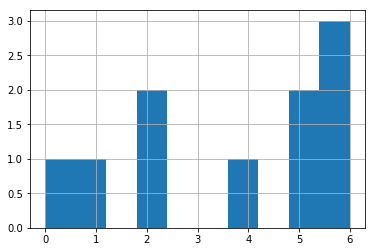

In [58]:
h = s.hist()

### 字符串方法

当 `Series` 或者 `DataFrame` 的某一列是字符串时，我们可以用 `.str` 对这个字符串数组进行字符串的基本操作： 

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

print(s.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## 合并

### 连接

In [60]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.435966,-0.845310,1.120255,0.556070
1,0.864781,0.283736,0.691002,-0.218690
2,0.624537,-1.236659,0.695547,-0.119178
3,-0.465352,-1.637627,-0.923465,-0.028363
4,0.999506,0.244458,-0.585232,-1.380944
5,0.164937,1.697516,-0.923579,0.841895
6,1.126740,2.220305,-0.087023,0.646729
7,0.135832,-0.875461,-2.032941,-2.199210
8,-1.783789,0.056471,-0.262199,-0.845146
9,0.389203,1.680487,-0.287031,-1.329299


可以使用 `pd.concat` 函数将多个 `pandas` 对象进行连接：

In [61]:
pieces = [df[:2], df[4:5], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,-0.435966,-0.845310,1.120255,0.556070
1,0.864781,0.283736,0.691002,-0.218690
4,0.999506,0.244458,-0.585232,-1.380944
7,0.135832,-0.875461,-2.032941,-2.199210
8,-1.783789,0.056471,-0.262199,-0.845146
9,0.389203,1.680487,-0.287031,-1.329299


### 数据库中的 Join

`merge` 可以实现数据库中的 `join` 操作：

In [62]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append

向 `DataFrame` 中添加行：

In [64]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,-0.944777,-0.246594,1.194345,0.801883
1,1.041013,1.483750,-1.686294,-0.163716
2,0.862676,-1.127994,-0.589615,0.465011
3,-1.669493,-0.347691,0.528037,-2.006495
4,-1.712478,-0.728380,0.041306,0.521077
5,0.692536,0.463743,1.606881,-0.514186
6,0.300967,-0.861116,-0.275076,-0.154166
7,-0.963736,-1.208307,-1.218414,1.253966


将第三行的值添加到最后：

In [65]:
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,-0.944777,-0.246594,1.194345,0.801883
1,1.041013,1.483750,-1.686294,-0.163716
2,0.862676,-1.127994,-0.589615,0.465011
3,-1.669493,-0.347691,0.528037,-2.006495
4,-1.712478,-0.728380,0.041306,0.521077
5,0.692536,0.463743,1.606881,-0.514186
6,0.300967,-0.861116,-0.275076,-0.154166
7,-0.963736,-1.208307,-1.218414,1.253966
8,-1.669493,-0.347691,0.528037,-2.006495


### Grouping

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.121112,-1.299652
1,bar,one,0.576311,-0.862488
2,foo,two,-2.052250,-0.707786
3,bar,three,-1.294127,0.043191
4,foo,two,-0.790270,0.940194
5,bar,two,0.060189,0.381704
6,foo,one,-1.835080,-0.810735
7,foo,three,-0.599168,0.542389


按照 `A` 的值进行分类：

In [67]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.657627,-0.437593
foo,-5.155656,-1.335590


按照 `A, B` 的值进行分类：

In [68]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.576311 -0.862488
    three -1.294127  0.043191
    two    0.060189  0.381704
foo one   -1.713969 -2.110387
    three -0.599168  0.542389
    two   -2.842519  0.232408

## 改变形状

### Stack

产生一个多 `index` 的 `DataFrame`：

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one     0.445811  1.219014
      two    -1.013553 -1.315057
baz   one     0.132211 -2.229172
      two    -0.514669 -1.339618
foo   one     0.989998  0.340173
      two    -0.159464  0.511856
qux   one     0.984230 -0.803486
      two     1.872562 -1.263858

`stack` 方法将 `columns` 变成一个新的 `index` 部分：

In [70]:
df2 = df[:4]

stacked = df2.stack()

stacked

first  second   
bar    one     A    0.445811
               B    1.219014
       two     A   -1.013553
               B   -1.315057
baz    one     A    0.132211
               B   -2.229172
       two     A   -0.514669
               B   -1.339618
dtype: float64

可以使用 `unstack()` 将最后一级 `index` 放回 `column`：

In [71]:
stacked.unstack()

A         B
first second                    
bar   one     0.445811  1.219014
      two    -1.013553 -1.315057
baz   one     0.132211 -2.229172
      two    -0.514669 -1.339618

也可以指定其他的级别：

In [72]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.445811 -1.013553
      B  1.219014 -1.315057
baz   A  0.132211 -0.514669
      B -2.229172 -1.339618

## 时间序列

金融分析中常用到时间序列数据：

In [73]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -1.183426
2012-03-07   -0.429619
2012-03-08    0.611285
2012-03-09   -1.207496
2012-03-10   -0.018379
Freq: D, dtype: float64

标准时间表示：

In [74]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00   -1.183426
2012-03-07 00:00:00+00:00   -0.429619
2012-03-08 00:00:00+00:00    0.611285
2012-03-09 00:00:00+00:00   -1.207496
2012-03-10 00:00:00+00:00   -0.018379
Freq: D, dtype: float64

改变时区表示：

In [75]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.183426
2012-03-06 19:00:00-05:00   -0.429619
2012-03-07 19:00:00-05:00    0.611285
2012-03-08 19:00:00-05:00   -1.207496
2012-03-09 19:00:00-05:00   -0.018379
Freq: D, dtype: float64

## Categoricals

In [76]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


可以将 `grade` 变成类别：

In [77]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别的表示转化为有意义的字符：

In [78]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

添加缺失的类别：

In [79]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

使用 `grade` 分组：

In [80]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图

使用 `ggplot` 风格：

In [81]:
plt.style.use('ggplot')

`Series` 绘图：

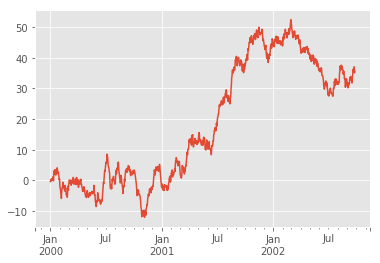

In [82]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

p = ts.cumsum().plot()

`DataFrame` 按照 `columns` 绘图：

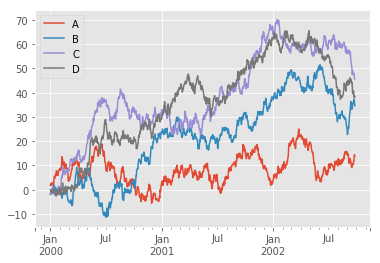

In [83]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df.cumsum().plot()
p = plt.legend(loc="best")

## 文件读写

### csv

写入文件：

In [95]:
df.to_csv('foo.csv')

从文件中读取：

In [96]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.763141,-1.967049,-1.383215,-0.047136
1,2000-01-02,-0.070470,0.650362,-0.420435,-0.509909
2,2000-01-03,0.891103,-0.398813,0.346696,0.109107
3,2000-01-04,-0.770820,0.081685,1.683264,-0.267800
4,2000-01-05,0.033730,-0.022706,-0.294659,-0.357453


In [100]:
pd.read_csv('foo.csv').shape

(1000, 5)

In [102]:
pd.read_csv('foo.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Unnamed: 0    1000 non-null object
A             1000 non-null float64
B             1000 non-null float64
C             1000 non-null float64
D             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.1+ KB


### hdf5

写入文件：

In [87]:
df.to_hdf("foo.h5", "df")

读取文件：

In [88]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2000-01-01,1.763141,-1.967049,-1.383215,-0.047136
2000-01-02,-0.070470,0.650362,-0.420435,-0.509909
2000-01-03,0.891103,-0.398813,0.346696,0.109107
2000-01-04,-0.770820,0.081685,1.683264,-0.267800
2000-01-05,0.033730,-0.022706,-0.294659,-0.357453


### excel

写入文件：

In [89]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

读取文件：

In [90]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,1.763141,-1.967049,-1.383215,-0.047136
2000-01-02,-0.070470,0.650362,-0.420435,-0.509909
2000-01-03,0.891103,-0.398813,0.346696,0.109107
2000-01-04,-0.770820,0.081685,1.683264,-0.267800
2000-01-05,0.033730,-0.022706,-0.294659,-0.357453


清理生成的临时文件：

In [91]:
import glob
import os

for f in glob.glob("foo*"):
    os.remove(f)